# plt and sns Lab solution

## <span style="color:red">**Warning:** Please avoid using ChatGPT in the lab.</span>


## Import needed libraries

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set()

## Import Data

In [6]:
df = pd.read_csv(r"E:\ITI AI&ML\8.Pandas\Data\shopping_trends.csv")

##### Data source: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/data

### Understand the data well

In [7]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


# Answer the following questions with the right visualization

### Use the specified graph if asked
### Graph completeness (labels and titles) matters.

## 1. what is the percentage of each gender in shopping 

<IPython.core.display.Javascript object>


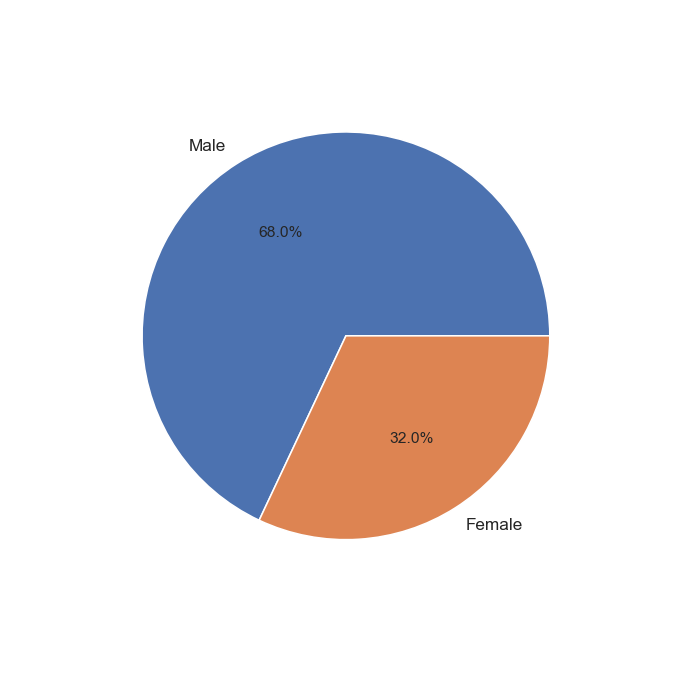

In [11]:
gender_percentages = df['Gender'].value_counts()
labels = ['Male', 'Female']
plt.figure(figsize=(6, 6))
# Using Pie Graph 
plt.pie(gender_percentages, labels=labels, autopct='%1.1f%%') 
plt.show()

# So the Male percentage is 68% and the Female percentage is 32% 

## 2. What is the distribution of age given gender (in one graph)

<IPython.core.display.Javascript object>


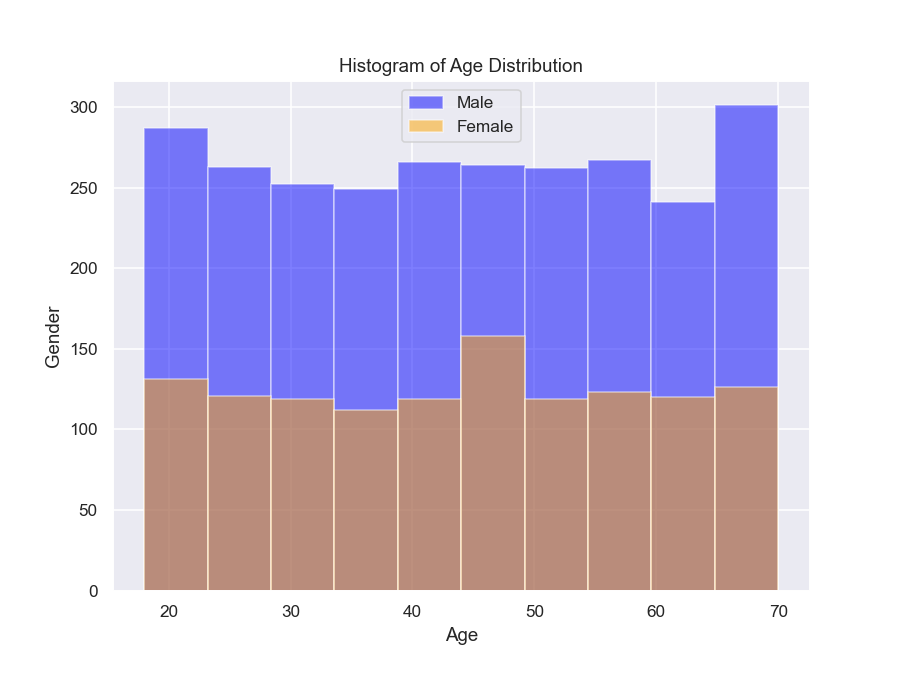

In [13]:
plt.figure(figsize=(8, 6))
colors = {'Male': 'blue', 'Female': 'orange'}

for gender, color in colors.items():
    subset = df[df['Gender'] == gender]
    plt.hist(subset['Age'], bins=10, alpha=0.5, color=color, label=gender)

plt.xlabel('Age')
plt.ylabel('Gender')
plt.title('Histogram of Age Distribution')
plt.legend()

plt.show()

## 3. How many items in each Category were purchased?

Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: Category, dtype: int64


<IPython.core.display.Javascript object>


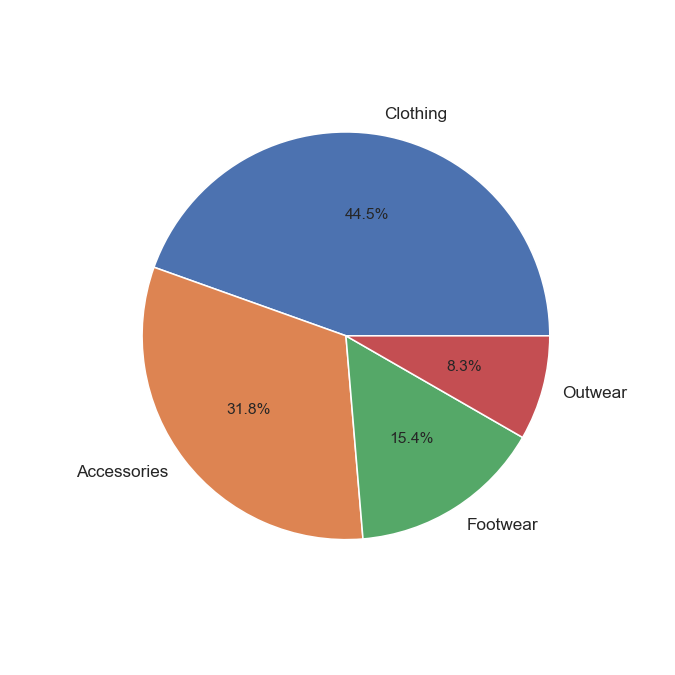

In [17]:
print(df['Category'].value_counts())
category_items = df['Category'].value_counts()
labels = ['Clothing', 'Accessories','Footwear','Outwear']
plt.figure(figsize=(6, 6))
# Using Pie Graph 
plt.pie(category_items, labels=labels, autopct='%1.1f%%') 
plt.show()

## 4. What is the percentage of each item size purchased?

<IPython.core.display.Javascript object>


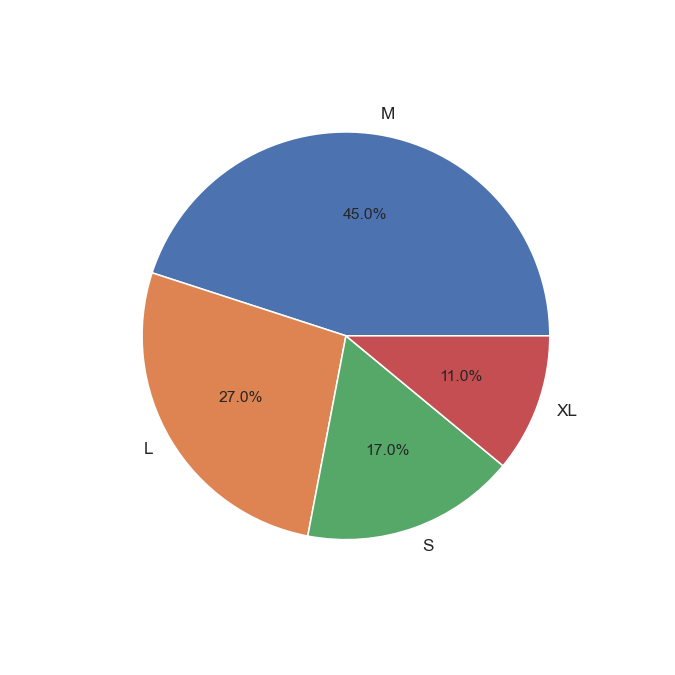

In [15]:
Size_percentage = df['Size'].value_counts(normalize=True) * 100

labels = ['M', 'L','S','XL']
plt.figure(figsize=(6, 6))
# Using Pie Graph 
plt.pie(Size_percentage, labels=labels, autopct='%1.1f%%') 
plt.show()

## 5. What is the distribution of purchase amount per gender? (Use boxplot)

<IPython.core.display.Javascript object>


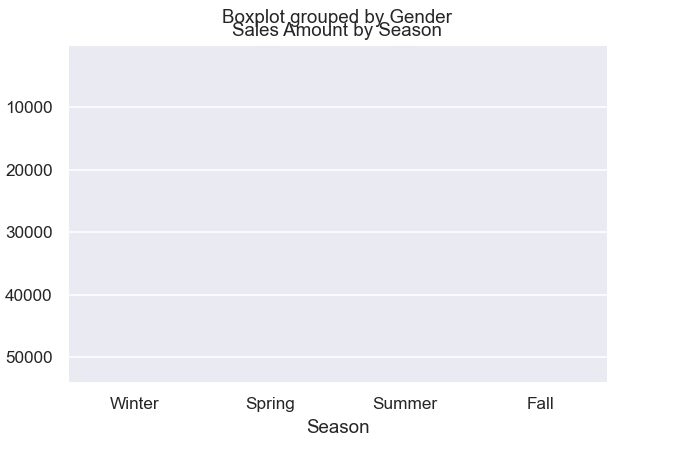

<AxesSubplot:title={'center':'Purchase Amount (USD)'}, xlabel='Gender'>

In [18]:
df.boxplot(column='Purchase Amount (USD)', by = 'Gender', grid=True)

## 6. What is the subscription Status by Gender? (use grouped column chart)

<IPython.core.display.Javascript object>


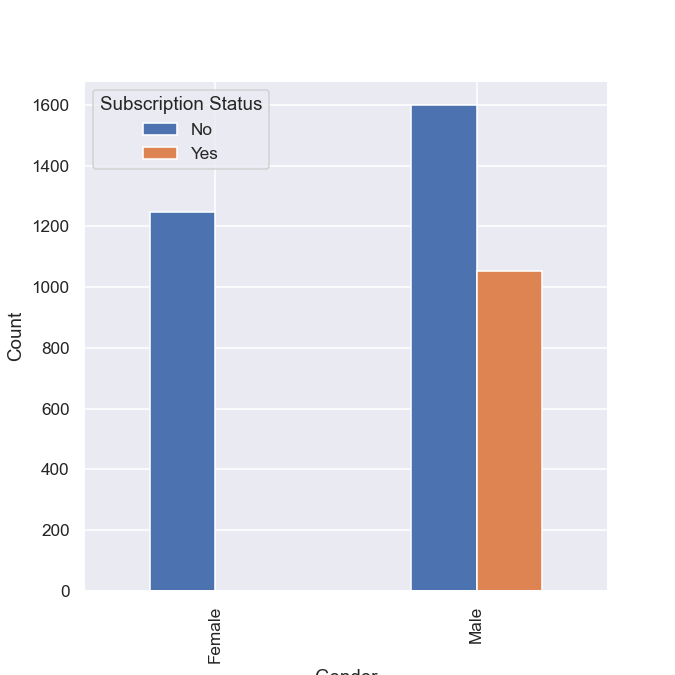

In [21]:
subscriptions = df.groupby(['Gender', 'Subscription Status']).size().unstack(fill_value=0)
subscriptions.plot(kind='bar', stacked=False, figsize=(6, 6))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Subscription Status')
plt.show()

## 7. What is wrong with the following graph? fix it.

### Answer:

<IPython.core.display.Javascript object>


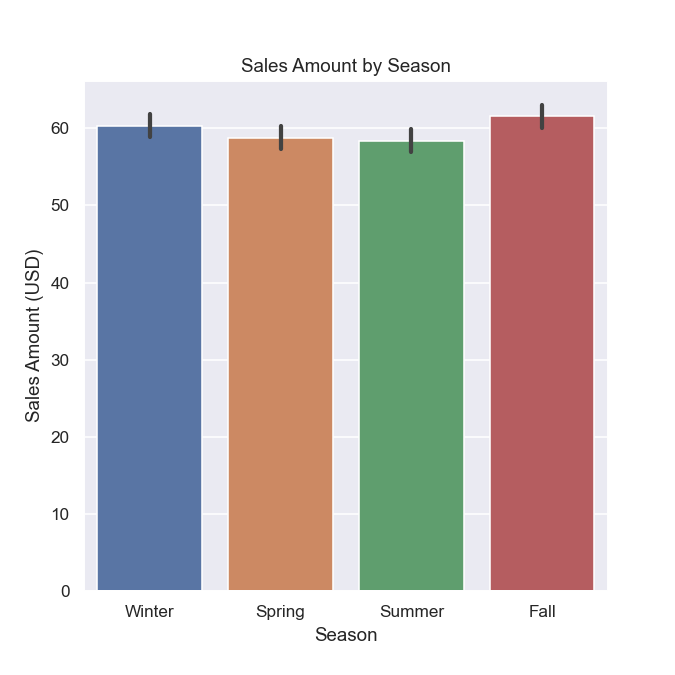

In [27]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df, x='Season', y='Purchase Amount (USD)')
plt.title('Sales Amount by Season')
plt.xlabel('Season')
plt.ylabel('Sales Amount (USD)')
plt.show()
# Problem was using the estimator and should using plt.figuers statement before the plot itself

In [22]:
sns.barplot(data=df, x='Season', y='Purchase Amount (USD)', estimator="sum")
plt.ylim(54000,)
plt.title('Sales Amount by Season')
plt.xlabel('Season')
plt.ylabel('Sales Amount (USD)')
plt.show()



### 8.What is the distribution of Purchase Amount by Season? (Use KDE)

<IPython.core.display.Javascript object>


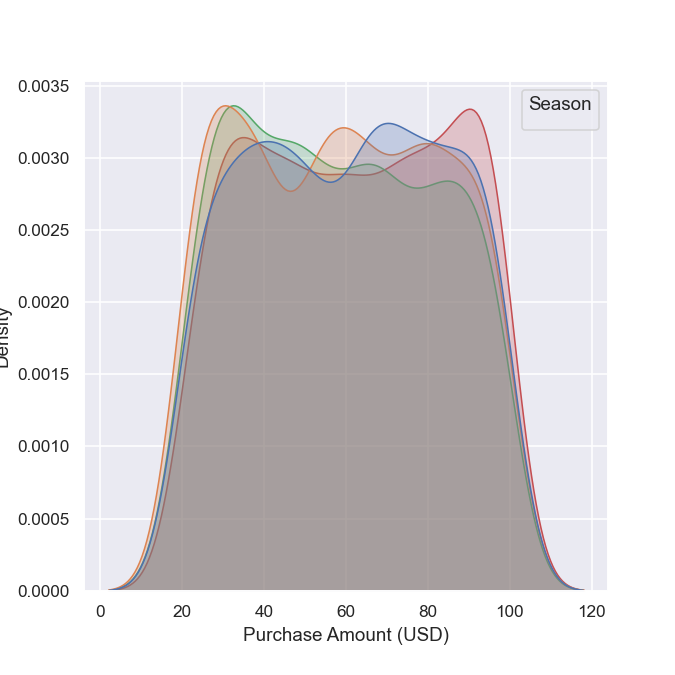

No handles with labels found to put in legend.


In [28]:
plt.figure(figsize=(6, 6))
sns.kdeplot(data=df, x='Purchase Amount (USD)', hue='Season', fill=True)
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Density')
plt.legend(title='Season')
plt.show() 

### 9. Which payment method performs the best? 

Payment Method
Bank Transfer    59.712418
Cash             59.704478
Credit Card      60.074516
Debit Card       60.915094
PayPal           59.245199
Venmo            58.949527
Name: Purchase Amount (USD), dtype: float64


<IPython.core.display.Javascript object>


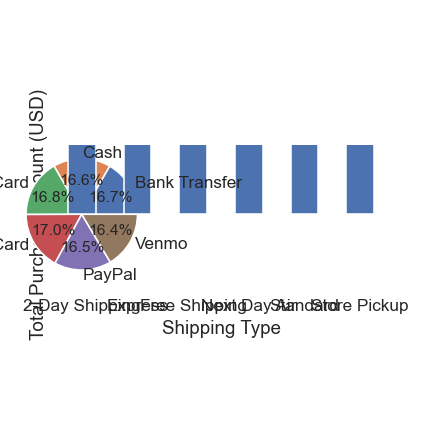

In [44]:
average_payment = df.groupby('Payment Method')['Purchase Amount (USD)'].mean()
print(average_payment)

labels = ['Bank Transfer', 'Cash','Credit Card','Debit Card','PayPal','Venmo']
plt.figure(figsize=(6, 6))
plt.pie(average_payment, labels=labels, autopct='%1.1f%%') 
plt.show()

### 10. What is the top 10 items purchased?

In [45]:
top_items = df['Item Purchased'].value_counts().head(10)
print(top_items)

Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Name: Item Purchased, dtype: int64


### 11. Does offering free shipping affect number of sales?

In [48]:
sales_comparison = df.groupby('Shipping Type')['Purchase Amount (USD)'].sum()
print(sales_comparison)

sales_comparison.plot(kind='bar', figsize=(6, 6))
plt.xlabel('Shipping Type')
plt.ylabel('Total Purchase Amount (USD)')
plt.show()

Shipping Type
2-Day Shipping    38080
Express           39067
Free Shipping     40777
Next Day Air      37993
Standard          38233
Store Pickup      38931
Name: Purchase Amount (USD), dtype: int64


<IPython.core.display.Javascript object>


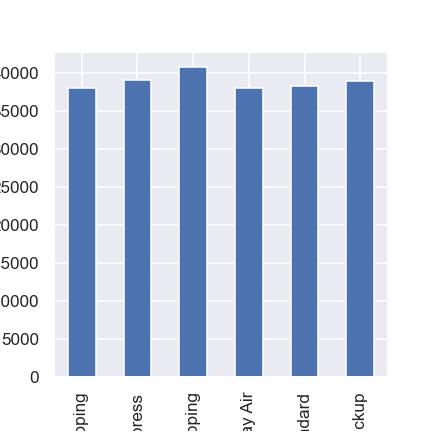

In [47]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df, x='Shipping Type', y='Purchase Amount (USD)')
plt.xlabel('Shipping Type')
plt.ylabel('Total Purchase Amount (USD)')
plt.show()